#IMPORTS

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn

np.random.seed(0)

#Data

In [114]:
from keras.datasets import mnist

In [133]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y_test shape : {y_test.shape}")

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


#Visualize example


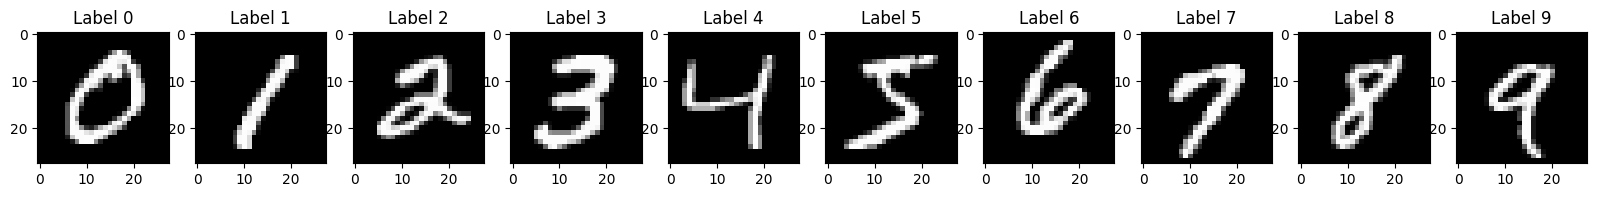

In [116]:
nb_of_classes=10
fig, ax = plt.subplots(1, 10,figsize=(20,20))
for i in range(0,nb_of_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label {i}")


In [117]:
#In order to pass from an array of labels to a matrix with probabilities 
y_train = keras.utils.to_categorical(y_train,nb_of_classes)
y_test = keras.utils.to_categorical(y_test,nb_of_classes)

#Prepare the Data

In [128]:
#Flatten the images
x_train=x_train.reshape(x_train.shape[0],-1)
print(f"New x_train shape : {x_train.shape}")
x_test=x_test.reshape(x_test.shape[0],-1)
print(f"New x_test shape : {x_test.shape}")

New x_train shape : (60000, 784)
New x_test shape : (10000, 784)


In [119]:
#Normalize the data
x_train= x_train / 255.0
x_test = x_test / 255.0

#Create the model

In [120]:
model = Sequential()    #allows us to create a flexible model in which we can add layers easily

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

#Train

In [121]:
batch_size=512
epochs=10

model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 17ms/step - loss: 0.5842 - accuracy: 0.8281
Epoch 2/10
118/118 [==============================] - 2s 18ms/step - loss: 0.2235 - accuracy: 0.9350
Epoch 3/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1623 - accuracy: 0.9530
Epoch 4/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1304 - accuracy: 0.9621
Epoch 5/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1074 - accuracy: 0.9693
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0929 - accuracy: 0.9729
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0782 - accuracy: 0.9761
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0670 - accuracy: 0.9799
Epoch 9/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0593 - accuracy: 0.9819
Epoch 10/10
118/118 [==============================] - 2s 19ms/step - loss: 0.0533 - accura

#Test

In [122]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9782


[0.07135391235351562, 0.9782000184059143]

In [123]:
y_pred=model.predict(x_test)
print(y_pred.shape)
y_pred_class=np.argmax(y_pred,axis=1)
print(y_pred_class[0:10])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[7 2 1 0 4 1 4 9 5 9]


In [106]:
print(x_test.reshape(10000,28,28).shape)

(10000, 28, 28)


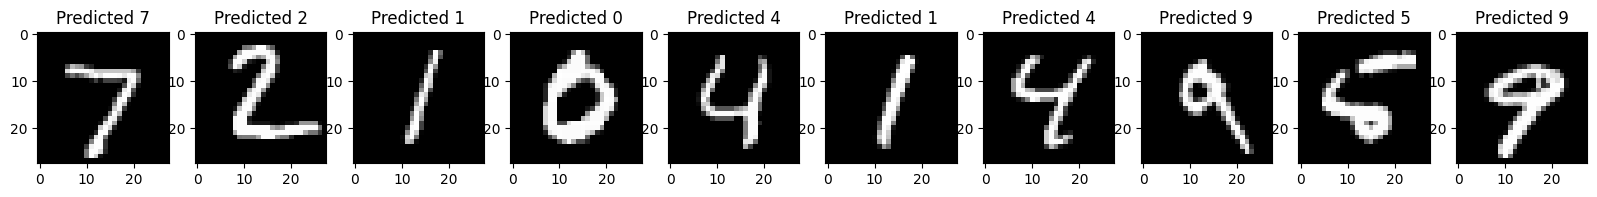

In [138]:
#Visualization of the results
fig, ax = plt.subplots(1, 10,figsize=(20,20))
for i in range(0,nb_of_classes):
  sample = x_test.view().reshape(10000,28,28)[i]                         #view to not affect x_test
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Predicted {y_pred_class[i]}")

#See Errors

Text(0.5, 1.0, 'Confusion Matrix')

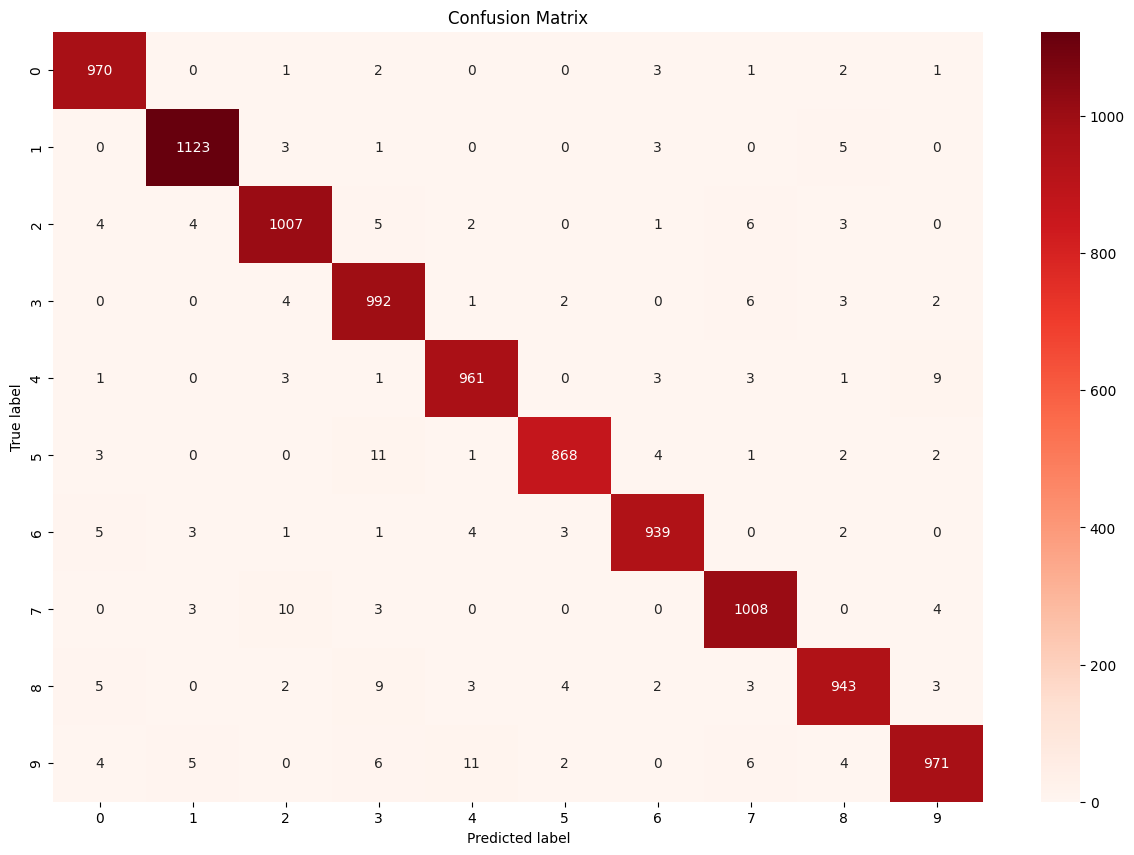

In [153]:
confusion_mtx=sklearn.metrics.confusion_matrix(y_test, y_pred_class)

fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(confusion_mtx,fmt='d',annot=True,cmap="Reds")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix")
